In [55]:
using Serialization
using Plots
include("run_ens_forecast.jl")
using .run_ens_forecast
pyplot()
using Statistics

In [123]:
function rel_err(i, name)
   info = deserialize(open(string("out_"*name*"_", i), "r"))
   return run_ens_forecast.mean(info.errs), run_ens_forecast.mean(info.errs_uncorr), run_ens_forecast.std(info.errs), run_ens_forecast.std(info.errs_uncorr)
end

rel_err (generic function with 1 method)

In [119]:
info = deserialize(open("out_chua_19", "r"))

Main.run_ens_forecast.ens_forecast.Forecast_Info(Any[1.2437472888725052, 1.1852716526057114, 3.136000712862997, 0.7660389222342029, 2.1368074074360623, 1.4506850655647445, 1.154613335551751, 0.5033970949920084, 1.6931941807690218, 1.039921476944928  …  1.212666728714526, 1.1551586836145293, 1.3727973391143817, 1.3936734568823292, 1.3719013996696163, 1.9298701415405881, 0.47851101091590476, 1.4681983634122735, 1.1670746570484862, 2.3773346217875218], Any[2.4035686915227075, 0.9615100941284983, 1.4692959503528347, 57.60620126989387, 82.25758751903301, 2.360635811284133, 63.33681049661986, 0.8280008018036873, 17.25362072966557, 56.03524589289659  …  0.7686626387720156, 27.462497469823518, 1.3475034583700602, 41.99989001398957, 355.1191291433961, 49.05101881606735, 1.1692188394651943, 2.3349266636727353, 1.4375363164958532, 2.4274781884494625], Any[0.9828870821641864, 1.0669805543810806, 1.246481186336264, 221.8064370085043, 251.7632087934876, 1.0294335507022214, 172.78976145735135, 1.0128

In [120]:
info.errs_uncorr

1000-element Array{Any,1}:
   2.4035686915227075
   0.9615100941284983
   1.4692959503528347
  57.60620126989387  
  82.25758751903301  
   2.360635811284133 
  63.33681049661986  
   0.8280008018036873
  17.25362072966557  
  56.03524589289659  
   1.3238932084842665
   0.615750719666093 
  72.08792435448879  
   ⋮                 
   1.3191911355770172
   1.1059488686046948
   0.7686626387720156
  27.462497469823518 
   1.3475034583700602
  41.99989001398957  
 355.1191291433961   
  49.05101881606735  
   1.1692188394651943
   2.3349266636727353
   1.4375363164958532
   2.4274781884494625

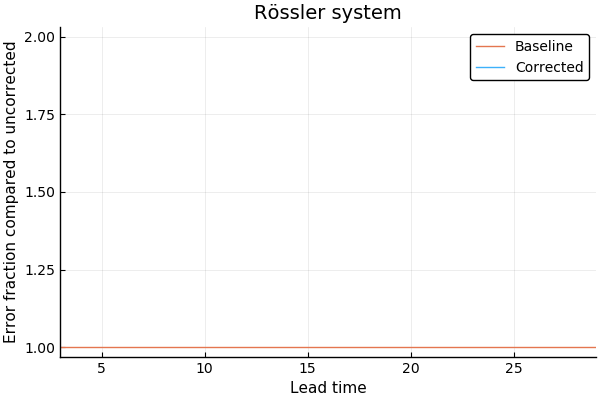

In [28]:
hline([1], label="Baseline", color="#E47650")
plot!((10:10:70)*0.4, rel_err.(["0", "1", "2", "3", "4", "5", "6"], "rossler"), color="#3DB1FA",
      xlabel="Lead time", ylabel="Error fraction compared to uncorrected", title="Rössler system",
      label="Corrected", xtickfontsize=10, ytickfontsize=10, legendfontsize=10)
xlims!(4 - 1, 70*0.4 + 1)
#hline!([0.63], label="Estimate from equation")
#savefig("rossler_new.pdf")

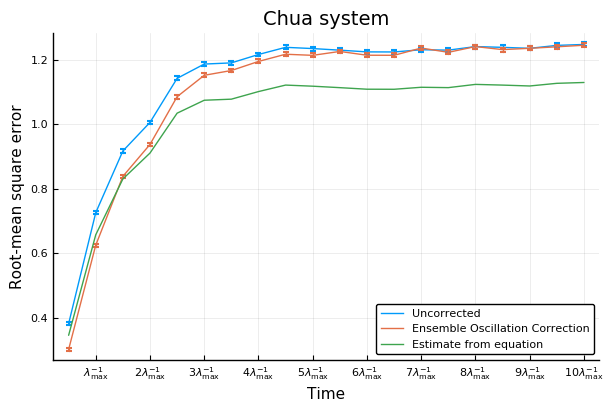

In [156]:
#hline([1], label="Baseline", color="#E47650")
using LaTeXStrings
means1 = []
means2 = []
stderrs1 = []
stderrs2 = []
for n in ["00", "01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12", "13", "14", "15", "16",
          "17", "18", "19"]#, "20", "21", "22", "23", "24", "25", "26", "27", "28", "29"]
    mean1, mean2, std1, std2 = rel_err.(n, "chua")
    append!(means1, mean1)
    append!(means2, mean2)
    append!(stderrs1, std1/sqrt(10000))
    append!(stderrs2, std2/sqrt(10000))
end
plot(means2, yerr=stderrs2, label="Uncorrected", title="Chua system", xticks=(2:2:20,
        [L"\lambda_{\mathrm{max}}^{-1}", L"2\lambda_{\mathrm{max}}^{-1}", L"3\lambda_{\mathrm{max}}^{-1}",
            L"4\lambda_{\mathrm{max}}^{-1}", L"5\lambda_{\mathrm{max}}^{-1}", L"6\lambda_{\mathrm{max}}^{-1}",
            L"7\lambda_{\mathrm{max}}^{-1}", L"8\lambda_{\mathrm{max}}^{-1}", L"9\lambda_{\mathrm{max}}^{-1}",
            L"10\lambda_{\mathrm{max}}^{-1}"]))
plot!(means1, yerr=stderrs1, label="Ensemble Oscillation Correction")
plot!(means2*sqrt(1-0.18), label="Estimate from equation")
xlabel!("Time")
ylabel!("Root-mean square error")
#plot!((10:10:70)*0.4, rel_err.(["0", "1", "2", "3", "4", "5", "6"], "colpitts"), color="#3DB1FA",
#      xlabel="Lead time", ylabel="Error fraction compared to uncorrected", title="Colpitts system",
#      label="Corrected", xtickfontsize=10, ytickfontsize=10, legendfontsize=10)
#xlims!(4 - 1, 70*0.4 + 1)
#hline!([0.64], label="Estimate from equation")
savefig("chua2.pdf")

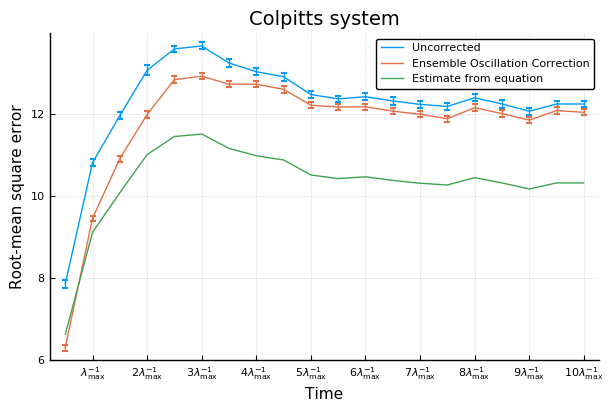

In [147]:
#hline([1], label="Baseline", color="#E47650")
using LaTeXStrings
means1 = []
means2 = []
stderrs1 = []
stderrs2 = []
for n in ["00", "01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12", "13", "14", "15", "16",
          "17", "18", "19"]#, "20", "21", "22", "23", "24", "25", "26", "27", "28", "29"]
    mean1, mean2, std1, std2 = rel_err.(n, "colpitts")
    append!(means1, mean1)
    append!(means2, mean2)
    append!(stderrs1, std1/sqrt(10000))
    append!(stderrs2, std2/sqrt(10000))
end
plot(means2, yerr=stderrs2, label="Uncorrected", title="Colpitts system", xticks=(2:2:20,
        [L"\lambda_{\mathrm{max}}^{-1}", L"2\lambda_{\mathrm{max}}^{-1}", L"3\lambda_{\mathrm{max}}^{-1}",
            L"4\lambda_{\mathrm{max}}^{-1}", L"5\lambda_{\mathrm{max}}^{-1}", L"6\lambda_{\mathrm{max}}^{-1}",
            L"7\lambda_{\mathrm{max}}^{-1}", L"8\lambda_{\mathrm{max}}^{-1}", L"9\lambda_{\mathrm{max}}^{-1}",
            L"10\lambda_{\mathrm{max}}^{-1}"]))
plot!(means1, yerr=stderrs1, label="Ensemble Oscillation Correction")
plot!(means2*sqrt(1-0.29), label="Estimate from equation")
xlabel!("Time")
ylabel!("Root-mean square error")
#plot!((10:10:70)*0.4, rel_err.(["0", "1", "2", "3", "4", "5", "6"], "colpitts"), color="#3DB1FA",
#      xlabel="Lead time", ylabel="Error fraction compared to uncorrected", title="Colpitts system",
#      label="Corrected", xtickfontsize=10, ytickfontsize=10, legendfontsize=10)
#xlims!(4 - 1, 70*0.4 + 1)
#hline!([0.64], label="Estimate from equation")
savefig("colpitts2.pdf")

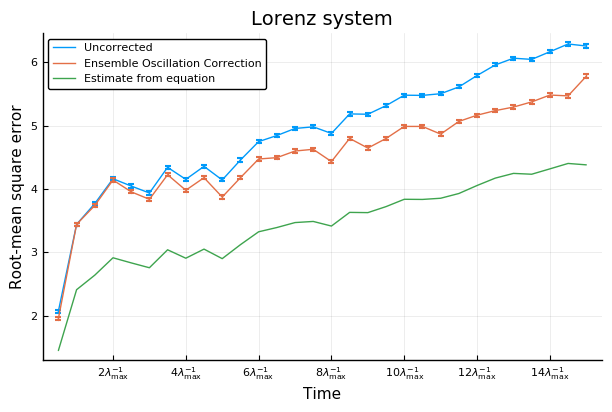

In [154]:
#hline([1], label="Baseline", color="#E47650")
using LaTeXStrings
means1 = []
means2 = []
stderrs1 = []
stderrs2 = []
for n in ["00", "01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12", "13", "14", "15", "16",
          "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "27", "28", "29"]
    mean1, mean2, std1, std2 = rel_err.(n, "osc")
    append!(means1, mean1)
    append!(means2, mean2)
    append!(stderrs1, std1/sqrt(10000))
    append!(stderrs2, std2/sqrt(10000))
end
plot(means2, yerr=stderrs2, label="Uncorrected", title="Lorenz system", xticks=(4:4:30,
        [L"2\lambda_{\mathrm{max}}^{-1}", L"4\lambda_{\mathrm{max}}^{-1}",
            L"6\lambda_{\mathrm{max}}^{-1}", L"8\lambda_{\mathrm{max}}^{-1}", L"10\lambda_{\mathrm{max}}^{-1}",
            L"12\lambda_{\mathrm{max}}^{-1}", L"14\lambda_{\mathrm{max}}^{-1}"]))
plot!(means1, yerr=stderrs1, label="Ensemble Oscillation Correction")
plot!(means2*sqrt(1-0.51), label="Estimate from equation")
xlabel!("Time")
ylabel!("Root-mean square error")
#plot!((10:10:70)*0.4, rel_err.(["0", "1", "2", "3", "4", "5", "6"], "colpitts"), color="#3DB1FA",
#      xlabel="Lead time", ylabel="Error fraction compared to uncorrected", title="Colpitts system",
#      label="Corrected", xtickfontsize=10, ytickfontsize=10, legendfontsize=10)
#xlims!(4 - 1, 70*0.4 + 1)
#hline!([0.64], label="Estimate from equation")
savefig("lorenz2.pdf")

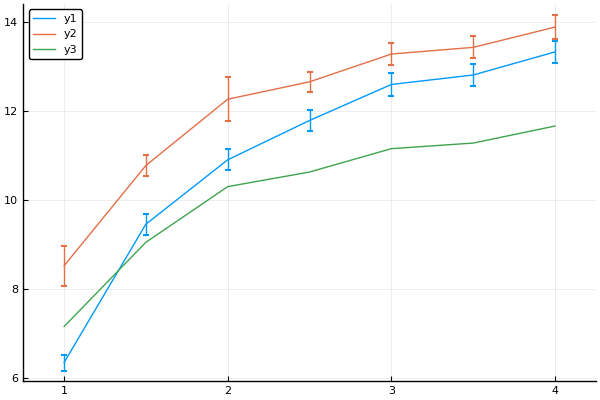

In [68]:
#hline([1], label="Baseline", color="#E47650")
means1 = []
means2 = []
stderrs1 = []
stderrs2 = []
for n in ["0", "1", "2", "3", "4", "5", "6"]
    mean1, mean2, std1, std2 = rel_err.(n, "colpitts")
    append!(means1, mean1)
    append!(means2, mean2)
    append!(stderrs1, std1/sqrt(1000))
    append!(stderrs2, std2/sqrt(1000))
end
plot((10:5:40)*0.1, means1, yerr=stderrs1)
plot!((10:5:40)*0.1, means2, yerr=stderrs2)
plot!((10:5:40)*0.1, means2*0.84)
#plot!((10:5:40)*0.1, rel_err.(["0", "1", "2", "3", "4", "5", "6"], "chua"), color="#3DB1FA",
    #      xlabel="Lead time", ylabel="Error fraction compared to uncorrected", title="Chua system",
#      label="Corrected", xtickfontsize=10, ytickfontsize=10, legendfontsize=10)
xlims!(1 - 1/4, 4 + 1/4)
#hline!([0.86], label="Estimate from equation")
#savefig("chua_new.pdf")